In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [13]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 4s 0us/step


In [15]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [19]:
print(f"Eğitim Verilerinin Sayısı ve Boyutu ={x_train.shape}")
print(f"Test Verilerinin Sayısı ve Boyutu ={x_test.shape}")

Eğitim Verilerinin Sayısı ve Boyutu =(60000, 28, 28)
Test Verilerinin Sayısı ve Boyutu =(10000, 28, 28)


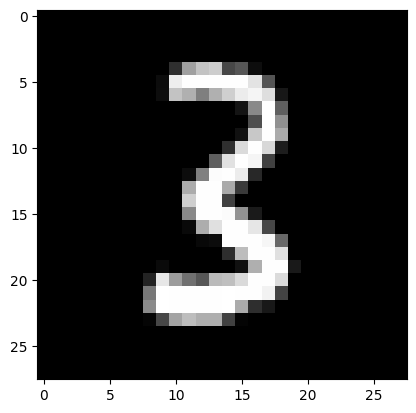

In [21]:
plt.imshow(x_train[50000],cmap='gray')

In [23]:
y_train[50000]

3

In [25]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [35]:
X_train, X_val, y_train_split, y_val = train_test_split(
    x_train,y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [37]:
print(f"Eğitim(Train) verilerinin son hali = {X_train.shape}")
print(f"Doğrulama(Val) verilerinin son hali = {X_val.shape}")

Eğitim(Train) verilerinin son hali = (48000, 28, 28)
Doğrulama(Val) verilerinin son hali = (12000, 28, 28)


In [57]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),

    #2
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.25),


    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')

    
    
    
])

In [59]:
model.compile(
    optimizer ='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'my_cnn_model_for_MNIST_dataset.h5',
    monitor ='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [63]:
print("Model Çalışıyor")

history = model.fit(
    X_train,y_train_split, validation_data=(X_val,y_val),
    batch_size=128, epochs=10, callbacks=model_checkpoint, verbose=1
)

Model Çalışıyor
Epoch 1/10
375/375 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9389
Epoch 1: val_accuracy improved from -inf to 0.22617, saving model to my_cnn_model_for_MNIST_dataset.h5
375/375 [==============================] - 32s 85ms/step - loss: 0.2025 - accuracy: 0.9389 - val_loss: 4.0864 - val_accuracy: 0.2262
Epoch 2/10
375/375 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9795
Epoch 2: val_accuracy improved from 0.22617 to 0.98758, saving model to my_cnn_model_for_MNIST_dataset.h5
375/375 [==============================] - 31s 84ms/step - loss: 0.0668 - accuracy: 0.9795 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 3/10
375/375 [==============================] - ETA: 0s - loss: 0.0480 - accuracy: 0.9848
Epoch 3: val_accuracy improved from 0.98758 to 0.99067, saving model to my_cnn_model_for_MNIST_dataset.h5
375/375 [==============================] - 32s 85ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0302 - val

In [64]:
print("Model,Test Verisi üzerinde Değerlendiriliyor:")

test_loss,test_accuracy =model.evaluate(x_test,y_test)

print(f"Test verisinin Loss değeri = {test_loss}")
print(f"Test verisinin Accuracy değeri = {test_accuracy}")

Model,Test Verisi üzerinde Değerlendiriliyor:
313/313 [==============================] - 2s 7ms/step - loss: 0.0200 - accuracy: 0.9941
Test verisinin Loss değeri = 0.019996298477053642
Test verisinin Accuracy değeri = 0.9940999746322632


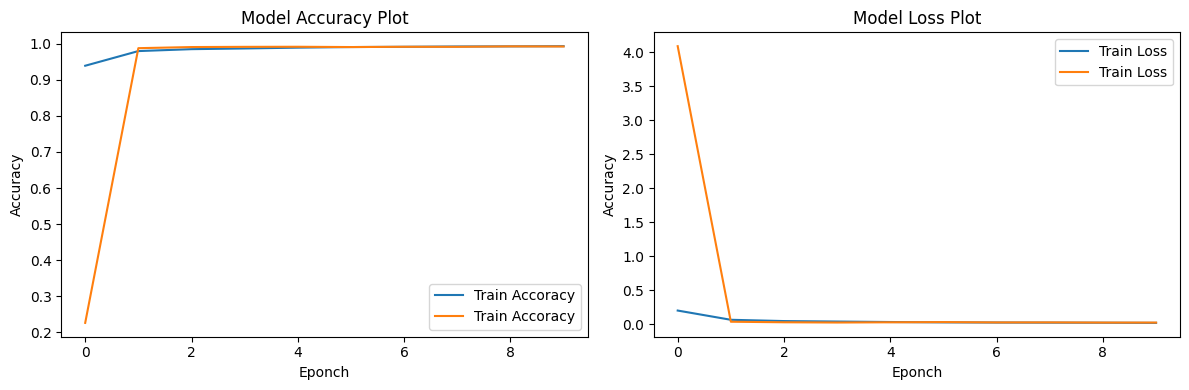

In [73]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accoracy')
plt.plot(history.history['val_accuracy'],label='Train Accoracy')
plt.title('Model Accuracy Plot')
plt.xlabel('Eponch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Train Loss')
plt.title('Model Loss Plot')
plt.xlabel('Eponch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [83]:
y_pred =model.predict(x_test)

y_pred_classes=np.argmax(y_perd,axis=1)
y_test_classes=np.argmax(y_test,axis=1)

313/313 [==============================] - 2s 7ms/step


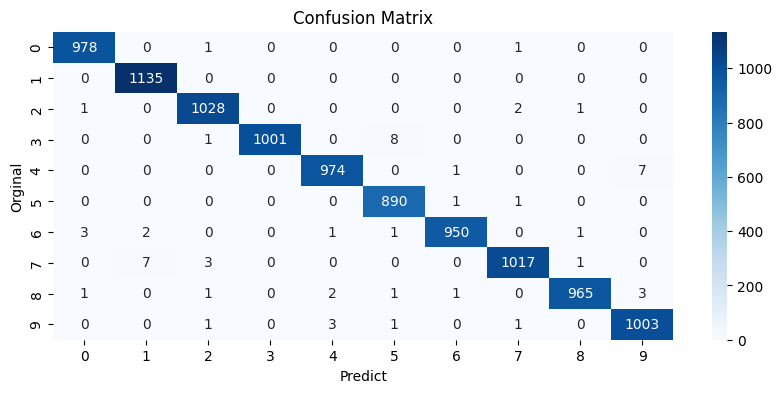

In [87]:
cm =confusion_matrix(y_test_classes,y_pred_classes)

plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Orginal')
plt.show()